<div style="width:50%; float:left;">
    <img src="support_files/AIBS_banner.png" width="430" align="left">
</div>

<div style="width:50%; float:right;">
    <img src="support_files/Dipde_Nick_final.png" width="100" height="100" align="right">
</div>

<div style="width:100%; float:left;">
    <hr>
</div>



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h1>Example: Singlepop</h1>
<p> In this example, a single internal dipde population receives from a single external dipde population.  As the background firing rate "`bgfr`" is increased, the steady-state firing rate that the simulation reaches increases as well.  Try adjusting this parameter with the slider bar, or changing the parameterization of the simulation in the function block.

In [1]:
%matplotlib notebook
import dipde
assert dipde.__version__ == '0.2.1'
from dipde.interfaces.jupyter import ProgressBar
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as ipw
import logging
logging.disable(logging.CRITICAL)

<IPython.core.display.Javascript object>


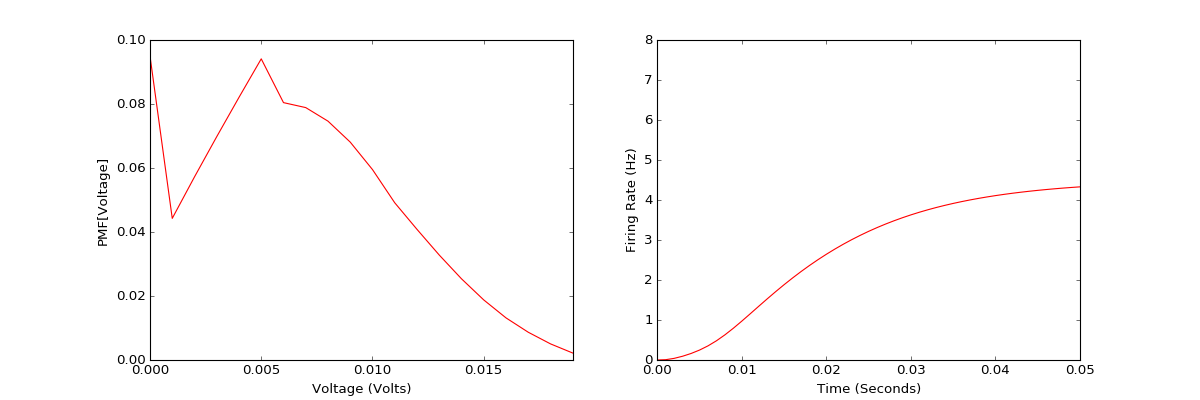

In [3]:
t0 = 0.
dt = .001
dv = .001
v_max = .02
tf = .1
tau_m=.02
weights={'distribution':'delta', 'loc':.005}
bgfr = ipw.IntSlider(min=90,max=110,step=1,value=100, continuous_update=False)
progress_bar=ProgressBar(display=False)
display(progress_bar.progress_bar)

@ipw.interact(bgfr=bgfr)
def f(bgfr):

    b1 = dipde.ExternalPopulation(bgfr)
    i1 = dipde.InternalPopulation(v_min=0, tau_m=tau_m, v_max=v_max, dv=dv, update_method='approx')
    b1_i1 = dipde.Connection(b1, i1, 1, weights=weights)
    network = dipde.Network([b1, i1], [b1_i1], progress=progress_bar)
    simulation_configuration = dipde.SimulationConfiguration(dt, tf, t0=t0)
    simulation = dipde.Simulation(network=network, simulation_configuration=simulation_configuration)
    simulation.run()

    fig, ax = plt.subplots(1,2, figsize=(15,5))
    i1.plot_probability_distribution(ax=ax[0], ylim=(0.,100*dv), color='r', show=False)
    i1.plot(xlim=(0,.05), ax=ax[1], ylim=(0,8), color='r', show=True)